### XOR

In daily communication, if someone asks to buy "bananas or apples", he/she usually means buy either of these but not both. This is the spirit of `XOR` operation. `XOR` is also known that **exclusive OR**. Note that `OR` operation is called **inclusive OR** (in "bananas or apples" case, you can buy either of these *or* both of these).

In some literature, it is also known as **logical difference** which is justified because `XOR(A,B)=1` if `A` $\neq$ `B`.

But why use `XOR` in cryptography? Why not use `AND` or `OR`? [This Khan Academy article](https://www.khanacademy.org/computing/computer-science/cryptography/ciphers/a/xor-and-the-one-time-pad) gives a very interesting example.

`XOR` is heavily used in cryptography given the property -

$$cipher\_text = plain\_text \oplus key$$

and then

$$(plain\_text \oplus key)\oplus key = plain\_text$$


However, here is the problem -

$$plain\_text \oplus\ cipher\_text = key $$


#### One-time pad

From Wikipedia -

In cryptography, the one-time pad (OTP) is an encryption technique that cannot be cracked, but requires the use of a single-use pre-shared key that is no smaller than the message being sent. In this technique, a plaintext is paired with a random secret key (also referred to as a one-time pad). Then, each bit or character of the plaintext is encrypted by combining it with the corresponding bit or character from the pad using modular addition.

The resulting ciphertext will be impossible to decrypt or break if the following four conditions are met:

 - The key must be random (uniformly distributed and independent of the plaintext).
 - The key must be at least as long as the plaintext.
 - The key must never be reused in whole or in part.
 - The key must be kept completely secret by the communicating parties.

In [38]:
plain = 0b10010101011
key   = 0b01010110110

cipher = plain ^ key
int(bin(cipher), base = 2)

1565

In [42]:
plain = 15    
key = 14      

cipher = 15 ^ 14

plain ^ cipher  #gives us the key

14

### Public Key Cryptography

We create two keys, a public key, and a private key. The public key is given freely, and any party can encrypt data by using it. However, the private key is kept secret and only those who hold it will have the ability to decrypt data.

![](images/pcc.jpeg)

How it works -

 `“I hate Peter.” + Public Key = “s80s1s9sadjds9s”` 

 `“s80s1s9sadjds9s” + Privatte Key = "I hate Peter"`

RSA and Elliptic Curve Cryptography are two examples of Public Key cryptography. Internet is highly reliant on RSA while Bitcoin uses ECC.


#### Trapdoor function



### RSA


#### Modular  Arithmatic

If two integers are divided, we have something like this - 

$$\frac{A}{B}= Q\ Remainder\  R$$

In modular arithmatic, we are rarely concerned with quotient and we only focus on remainder. 

For example, in

$$\frac{9}{2}$$

we get $4$ as quotient and $1$ as remainder. In modular arithmatic we write this as 

$$9\ \bmod\ (2) = 1$$

To find the result of $A\ \text{mod}\ B$,we can follow these steps:

 - Construct this clock for size $B$
 - Start at 0 and move around the clock $A$ steps
 - Wherever we land is our solution.

(If the number is positive we step clockwise, if it's negative we step counter-clockwise.)

#### Congruence Modulo

Consider the expression below - 

$$A≡B\bmod\ C)$$

This says $A$ is **congruent** to $B$ modulo $C$. For example, $11≡5\bmod 2$ means that $11\bmod 2$ and $5\bmod 2$ produce same value. In other words, $A$ and $B$ are in the same **equivalence** class.

Alternatively, we can say that $A-B$ is integer multiple of $C$.

It is important to keep in mind that modulo $C$, although written on LHS, actually applies to both side. This means -

$$A\bmod C = B\bmod C$$
<br>

#### Fermat's Little Theorem

Fermat little theorem states that if $p$ is prime, this congruence is valid for any $a$ in the environment of modulo artihemtic of base $p$:

$$a^{p−1} ≡ 1 (\bmod p)$$.

This theorem may be used to sieve prime numbers. So you take, for example, $10$ and test it. Let’s take some random $a$ value ($123$)

In [1]:
pow(123,(10-1))%10

3

This means $10$ is not a prime number as output isn't $1$. On the other hand, for $11$ - 

In [2]:
pow(123,(11-1))%11

1

Output of $1$ indicates $11$ *may be* a prime number.

Note, however, that output of 1 doesn't indicate that given number is prime. For example, $1105$ isn't a prime - 

In [3]:
pow(123,(1105-1))%1105

1

Fermat's Little Theorem is not the test of primality. It states a property of prime numbers. All prime numbers will satisfy above mentioned rule but it doesn't mean any number satisfying the rule is necessarily a prime number. 

#### Euler’s totient function

It is a number of coprime numbers under some $n$. Denoted as $ϕ(n)$. For example, $\phi(9)$ gives us $[1,2,4,5,7,8]$. It is easy to see that any of these number is relatively prime to $n=9$. The number $3$ is not in the list because $9$ is divisible by $3$.

$$\phi(n)= n\prod_{p|n}(1-\frac{1}{p})$$

where the product is over the distinct prime numbers dividing $n$.


For the sake of simplification, you
may just keep in mind that if $n = pq$ (i.e., product of two distinct prime numbers), 

$$φ(pq) = (p − 1)(q − 1)$$ 

This is true for RSA environment.

#### Euler’s theorem


Euler’s theorem is a generalization of Fermat little theorem. It states:

$$a^{φ(n)} ≡ 1 (\bmod n)$$

where $a$ and $n$ are relatively prime. 

If $n$ is prime, then $\phi(n)=n-1$. This gives us Fermat little theorem.

But again, for the sake of simplification, we may keep in mind that Euler’s theorem in the RSA environment is this:

$$a^{(p−1)(q−1)} ≡ 1 (\bmod  n)$$

where $n = pq$ and both $p$ and $q$ are prime numbers. This theorem is central to RSA algorithm.

#### RSA Example

There are *The Sender* and *The Receiver*. *The Receiver* generates two big prime numbers ($p$ and $q$) and publishes its product $(n = pq)$. Both $p$ and $q$ are kept secret.

For the illustration, let’s randomly pick 89 as $p$ and 43 as $q$.

Then $n$ = 89\*43 = 3827

3827 is published as public key, named public key modulus or modulo. It is semiprime. There is also public key exponent $e$, which is not secret, is often 65537, but we will use 17 to keep all results tiny.

Now *The Sender* wants to send a message (123 number) to *The Receiver* and he/she uses one-way function:

In [17]:
n = 3827                          #n=p*q, public
e = 17                            # encrypting exponent, public
encrypted = pow(123, e, mod = n)  #equivalent to pow(123,n) % n
encrypted                         #this is public part of public key cryptography, anybody can encrypt the message

3060

3060 is encrypted message, which can be decrypted only using $p$ and $q$ values separately. This is one-way function, because only a part of exponentiation result is left. One and important consequence is that even *The Sender* can’t decrypt it. This is why you can encrypt a piece of text in PGP/GnuPG to someone using his/her public key, but can’t decrypt it. Perhaps, that’s how CryptoLockers works, making impossible to decrypt the files.

recover message (123), $p$ and $q$ values must be known. First, we get the result of Euler’s totient function $(p − 1)(q − 1)$ (this is the point where $p$ and $q$ values are needed):

In [7]:
totient = (89-1)*(43-1) 
totient

3696

Note - function `pow(base, exp, mod=None)` is equivalent to `pow(base,exp) % mod`, although former is more efficient. 

From Python 3.8, the second argument in function `pow(base, exp, mod=None)`  is allowed to be negative which permits us to compute modular inverses. If `mod` is present and `exp` is negative, then `base` must be relatively prime to `mod`. In that case, `pow(inv_base, -exp, mod)` is returned, where `inv_base` is an inverse to base modulo mod. For example, we compute an inverse for 38 modulo 97:

In [13]:
pow(38, -1, mod=97)

23

In [14]:
 23 * 38 % 97 == 1

True

Another example - 

In [8]:
pow(3,-1, 32)

11

For $m$ = 11, equation $3m=16k+1$ is satisfied for some integer $k$.

Following code illustrates how 11 is output - 

In [155]:
a =  1

while 1:
    b = (3*a)%32
    if b != 1:
        a+= 1
    else:
        break
        
print(a)        

11


Now we calculate decrypting exponent $d$ using multiplicative modulo inverse (means $d$ satisfies $d*e ≡ 1\bmod totient$):



In [9]:
d = pow(e,-1,totient)
d

2609

In [12]:
(d*e)%totient, 1%totient

(1, 1)

Now decrypt the message - 

In [18]:
pow(encrypted, d, n)

123

So the $d$ exponent forms another one-way function, restoring the work of what was done during encryption.

Let's summarize the process - 

 1. Choose 2 primes $p$ and $q$. Compute $n = p*q$.
 
 
 2. Choose sume enrypting exponent $e$.
 
 
 3. Compute `pow(message, e, mode = n)`. This gives us encrypted message.
 
 
 4. calculate totient = $(p-1)(q-1)$.
 
 
 5. Calculate decrypting exponent $d$ by computing `pow(e, -1, mod = totient)`.
 
 
 6. Now decrypt the message via `pow(encrypted, d, mod = n)`

Why this works? This works because because $e$ and $d$ exponents are reciprocal to each other by modulo $totient = (p − 1)(q − 1)$.

This allows ($m$ for message, $encrypted$ for encrypted message) - 

$$m^{ed}  ≡ m\ (\bmod n)$$

So the encryption process is $m^e\ (\bmod n)$, decryption is $(encrypted)^d$  ≡ $(m^e)^d  ≡ m\ (\bmod n)$.

<BR>

### Elliptic Curve Cryptography

This is 'copypasta' from [this source](https://andrea.corbellini.name/2015/05/17/elliptic-curve-cryptography-a-gentle-introduction/) which, in turn, seems to be (at least partly) based on [this paper](https://hal.archives-ouvertes.fr/hal-01914807).     
<br>    
    
An elliptic curve will simply be the set of points described by the equation:
 
$$y^2 = x^3 + ax + b$$

where $4a^3+27b^2\neq0$. This condition is required to exclude singular curves. 
    
Setting  $a = -3$ and $b=5$ and plotting it gives us following curve


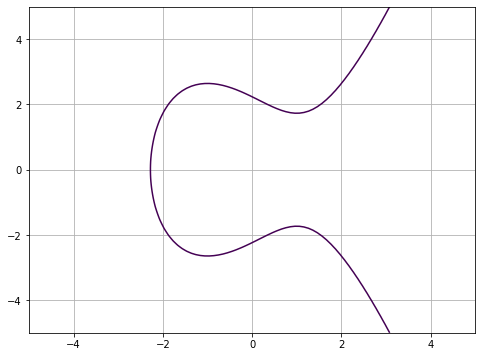

In [54]:
# this is sourced from, as usual, https://stackoverflow.com/questions/19756043/python-matplotlib-elliptic-curves
%matplotlib inline

a = -3
b = 5

y, x = np.ogrid[-5:5:100j, -5:5:100j]
plt.figure(figsize = (8,6))
plt.contour(x.ravel(), y.ravel(), pow(y, 2) - pow(x, 3) - x * a - b, [0])
plt.grid()
    


Examples of singular curves - 

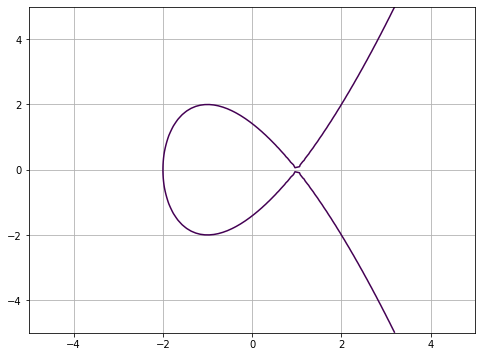

In [44]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

a = -3
b = 2

y, x = np.ogrid[-5:5:100j, -5:5:100j]
plt.figure(figsize = (8,6))
plt.contour(x.ravel(), y.ravel(), pow(y, 2) - pow(x, 3) - x * a - b, [0])
plt.grid()
    

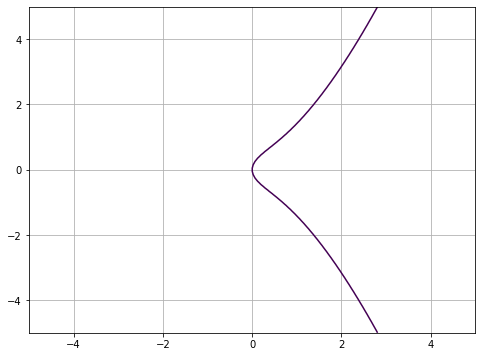

In [45]:
a = 1
b = 0

y, x = np.ogrid[-5:5:100j, -5:5:100j]
plt.figure(figsize = (8,6))
plt.contour(x.ravel(), y.ravel(), pow(y, 2) - pow(x, 3) - x * a - b, [0])
plt.grid()

It is easy to see all of them are symmetric about x-axis.





#### Groups


A group in mathematics is a set for which we have defined a binary operation that we call "addition" and indicate with the symbol $+$. In order for the set $\mathbb{G}$ to be a group, addition must defined so that it respects the following four properties:

 1. **closure**: if $a$ and $b$ are members of $\mathbb{G}$ , then $a+b$ is a member of $\mathbb{G}$;


 2. **associativity**: $(a+b)+c = a+(b+c)$
 
 
 3.  there exists an **identity element** $0$ such that $a+0=0+a=a$;
 
 
 4. every element has an **inverse**, that is: for every $a$ there exists $b$ such that $a+b=0$.

If we add a fifth requirement:

 5. commutativity: $a+b = b+a$,

then the group is called *abelian group*.

With the usual notion of addition, the set of integer numbers $\mathbb{Z}$ is a group (moreover, it's an abelian group). The set of natural numbers $\mathbb{N}$ however is not a group, as the fourth property can't be satisfied.

Groups are nice because, if we can demonstrate that those four properties hold, we get some other properties for free. For example: the identity element is unique; also the inverses are unique, that is: for every $a$
there exists only one $b$ such that $a+b=0$ (and we can write $b$ as $-a$ ). Either directly or indirectly, these and other facts about groups will be very important for us later.

Before we move forward, let's talk about addition operation. This operation has different meanings depending on the context. In usual arithmatic, we use it in the sense $2+1=3$. In vector algebra, $\vec{a}+\vec{b}$ means something different. Then we have the case of string concatenation operation like `Peter+Norton=PeterNorton`. In programming, we call it operator overloading. So be warned, when you read something like $P+Q$ in current context, it will mean something entirely different. So different that you'll be initially stumped. 


So, other than $\mathbb{Z}$, what else can be an example of abelian group? Turns out the set of all points on an elliptic curve, with some hacking, also forms an abelian group. 

Ok. 

But what about the addition operation? How do we define that for elliptic curve points? As indicated earlier, addition operation would mean something entirely different in current context. And what will serve as $0$? Now things are going to be interesting. 

For our purposes, we will need a **point at infinity** (also known as **ideal point**) to be part of our curve and this point will serve as $0$. From now on, we will denote our point at infinity with the symbol $0$ (zero). Keep in mind that this $0$ and the usual $0$ are two different things. Also, the point (0,0) has nothing to do with this $0$.

If we want to explicitly take into account the point at infinity, we can refine our definition of elliptic curve as follows:

<br>

$$\left\{ (x, y) \in \mathbb{R}^2\ |\ y^2 = x^3 + ax + b,\ 4 a^3 + 27 b^2 \ne 0 \right\}\ \cup\ \left\{ 0 \right\}$$

<br>

#### The group law for elliptic curves

<br>

We can define a group over elliptic curves. Specifically:

 - the elements of the group are the points of an elliptic curve;
 - the identity element is the point at infinity 0;
 - the inverse of a point is the one symmetric about the $x$-axis;
 - addition is given by the following rule: given three aligned, non-zero points $P$, $Q$ and $R$, their sum is $P+Q+R=0$.
 
The addition operation needs some special attention. 



#### Geometric Addition

<br>

Thanks to the fact that we are in an abelian group, we can write $P+Q+R$ as $P+Q=-R$ . This equation, in this form, lets us derive a geometric method to compute the sum between two points $P$ and $Q$: if we draw a line passing through $P$ and $Q$, this line will intersect a third point $R$ on the curve, (this is implied by the fact that $P$ and $Q$ are aligned). If we take the inverse of this point, $-R$ , we have found the result of  $P+Q$.

![](images/point-addition.png)

This geometric method works but we need to work out some edge cases.

 - $P=0$ or $Q=0$ : We use the group property $P+0=P$ or $Q+0=Q$
 
 
 - $P=-Q$ : This gives us a vertical line. But again $P+Q = P+(-P)=0$ because of group property.


 - $P=Q$ : This means our line is tangent to the curve at point $P$. But it would still intersect the curve at some point $R$, which would give us $-R$
 
 
 - $P \neq Q$ but there is no third point : This is the situation where line intersects curve at two points. In this case, line will actually be tangent at one point (either $P$ or $Q$). If it is tangent at the point $P$, then $P+Q= -P$.  

This covers all the possible cases. However, we still need to perform computations. 

#### Algebraic Addition

We already know that $P+(-P) =0$ , and $P+0 = 0+P=P$. So, in our equations, we will avoid these two cases and we will only consider two non-zero, non-symmetric points $P = (x_p, y_p)$ and $Q = (x_q, y_q)$. 

Assuming $P$ and $Q$ to be distinct, the slope of line passing through them will be:

$$m = \frac{y_p-y_q}{x_p-x_q}$$

Then the third intersection point $R= (x_r, y_r)$ will be given by:

$$x_r = m^2-x_p-x_q$$
$$y_r = y_p + m(x_r-x_p)$$

Or equivalently,

$$y_r = y_q + m(x_r-x_q)$$

<br>

So, $P +Q$ will be $-R$ with coordinaates $(x_r, -y_r)$. Pay attention to the sign of $y_r$.

<br>

**Case where** $P$ = $Q$:

In this casse, we use following formula for $m$:

$$m = \frac{3x^2_p+a}{2y_pa}$$

<br>

Note that Note that, as we would expect, this expression for $m$ is the first derivative of:

<br>

$$y_p = \pm\sqrt{x^3_p+ax_p+b}$$

<br>

#### Scalar Multiplication

Other than addition, we can define another operation: scalar multiplication, that is: 

$$nP = \underbrace{P + P + \cdots + P}_{n\ \text{times}}$$

where $n$ is the natural number. The security of modern ECC depends on the intractability of determining n from $Q = nP$ given known values of $Q$ and $P$ if $n$ is large.

The elementary algorithm, i.e. repeatedley adding $P$ to $P$, is rather impractical because it grows exponentially. There are other methods which are much faster. **double and add** is one such method. 

Its principle of operation can be better explained with an example. Take $n = 153$. Its binary representation is ${10010111}_2$. This binary representation can be turned into a sum of powers of two:

$$\begin{align*}
    151 & = 1 \cdot 2^7 + 0 \cdot 2^6 + 0 \cdot 2^5 + 1 \cdot 2^4 + 0 \cdot 2^3 + 1 \cdot 2^2 + 1 \cdot 2^1 + 1 \cdot 2^0 \\
        & = 2^7 + 2^4 + 2^2 + 2^1 + 2^0
\end{align*}$$

In view of this, we can write: 

$$151 \cdot P = 2^7 P + 2^4 P + 2^2 P + 2^1 P + 2^0 P$$

In [134]:
def bits(n):
    """
    Generates the binary digits of n, starting
    from the least significant bit.

    bits(151) -> 1, 1, 1, 0, 1, 0, 0, 1
    """
    while n:
        yield n & 1 #I wasted hours because I thought `yield n & 1` is same as `(yield n) & 1`. `n & 1` is executed first
        n >>= 1

a, b = -7, 10  # curve coefficients from your exemple

def add(P, Q):
    if P is None or Q is None: # check for the zero point 
        return P or Q
    xp, yp = P
    xq, yq = Q
    if xp == xq:
        return double(P)
    m = (yp - yq) / (xp - xq)
    xr = m**2 - xp - xq
    yr = yp + m * (xr - xp)
    return (xr, -yr)

def double(P): 
    if P is None:
        return None 
    xp, yp = P 
    m = (3 * xp ** 2 + a) / (2 * yp) 
    xr = m**2 - 2*xp 
    yr = yp + m * (xr - xp) 
    return (xr, -yr)

def double_and_add(n, P):
    result = None # This is our zero point
    addend = P
    for b in bits(n):
        if b:
            result = add(result, addend)
        addend = double(addend)
    return result

double_and_add(2,(1,2))

(-1.0, -4.0)

#### Logarithm

Given $n$ and $P$, we now have at least one polynomial time algorithm for computing $Q =nP$. But what about the other way round? What if we know $Q$ and $P$ and need to find out $n$? This problem is known as the logarithm problem. We call it "logarithm" instead of "division" for conformity with other cryptosystems (where instead of multiplication we have exponentiation).

I don't know of any "easy" algorithm for the logarithm problem, however playing with multiplication it's easy to see some patterns. For example, take the curve $y^2 = x^3 - 3x + 1$ and the point $P = (0, 1)$. We can immediately verify that, if $n$ is odd, $nP$ is on the curve on the left semiplane; if $n$ is even, $nP$ is on the curve on the right semiplane. If we experimented more, we could probably find more patterns that eventually could lead us to write an algorithm for computing the logarithm on that curve efficiently.

But there's a variant of the logarithm problem: the discrete logarithm problem. As we will see in the next sections, if we reduce the domain of our elliptic curves, scalar multiplication remains "easy", while the discrete logarithm becomes a "hard" problem. This duality is the key brick of elliptic curve cryptography.

#### Finite Fields 

A finite field is, first of all, a set with a finite number of elements. An example of finite field is the set of integers modulo $p$, where $p$ is a prime number. It is generally denoted as $\mathbb{Z}/p$ or $\mathbb{Z}_p$. We will use the latter notation.

In fields we have two binary operations: addition $(+)$ and multiplication $(·)$. Both are closed, associative and commutative. For both operations, there exist a unique identity element, and for every element there's a unique inverse element. Finally, multiplication is distributive over the addition: $x \cdot (y + z) = x \cdot y + x \cdot z$.

The set of integers modulo consists of all the integers from $0$ to $p-1$. Addition and multiplication work as in modular arithmetic. 

The order of a finite field is the number of elements in the field. There exists a finite field $\mathbb{F}$ of order $q$ if and only if $q$ is a prime power, i.e., $q = p^m$ where $p$ is a prime number called the characteristic of $\mathbb{F}$, and $m$ is a positive integer. If $m = 1$, then $\mathbb{F}$ is
called a prime field. If m $≥ 2$, then $\mathbb{F}$ is called an extension field. For any prime power
$q$, there is essentially only one finite field of order $q$; informally, this means that any
two finite fields of order $q$ are structurally the same.

Here are a few examples of operations in $\mathbb{F}_{23}$:

In [143]:
#addition: (18+9) modulo 23 = 4
print((18+9)%23)

#subtraction: (7-14) modulo 23 = 16
print((7-14)%23)

#multiplication: (4*7) modulo 23 = 5
print((4*7)%23)

#additive inverse: -5 modulo 23 = 18
print((-5)%23)

#multiplicative inverse: 9^(-1) modulo 23 = 18, equivalent to (9*18)%23 = 1
print(pow(9,-1,23)) #notice the use of pow funcion.

4
16
5
18
18


As we already said, the integers modulo $p$ are a field, and therefore all the properties listed above hold. Note that the requirement for $p$ to be prime is important! The set of integers modulo 4 is not a field: 2 has no multiplicative inverse (i.e. the equation $2 \cdot x \bmod{4} = 1$ has no solutions).

#### Division modulo $p$

$x/y$ in $\mathbb{F}_p$ is same as $x\cdot y^{-1}$. We already know how to calculate inverse in Python.

#### Extended Euclid Algorithm

This computes, in addition to the greatest common divisor (gcd) of integers $a$ and $b$, also the coefficients of Bézout's identity, which are integers $x$ and $y$ such that
    
$${\displaystyle ax+by=\gcd(a,b)}$$ 

In [176]:
def eea(a, b):
    """
    Returns a three-tuple (gcd, x, y) such that
    a * x + b * y == gcd, where gcd is the greatest
    common divisor of a and b.

    This function implements the extended Euclidean
    algorithm and runs in O(log b) in the worst case.
    """
    s, old_s = 0, 1
    t, old_t = 1, 0
    r, old_r = b, a

    while r != 0:
        quotient = old_r // r
        old_r, r = r, old_r - quotient * r
        old_s, s = s, old_s - quotient * s
        old_t, t = t, old_t - quotient * t

    return old_r, old_s, old_t


In [173]:
eea(240,46)

(2, -9, 47)

In [174]:
def inverse_of(n, p):
    """
    Returns the multiplicative inverse of
    n modulo p.

    This function returns an integer m such that
    (n * m) % p == 1.
    """
    gcd, x, y = eea(n, p)
    assert (n * x + p * y) % p == gcd

    if gcd != 1:
        # Either n is 0, or p is not a prime number.
        raise ValueError(
            '{} has no multiplicative inverse '
            'modulo {}'.format(n, p))
    else:
        return x % p

In [175]:
inverse_of(9,23)

18

In [338]:
a =  1

while 1:
    b = (9*a)%23
    if b != 1:
        a+= 1
    else:
        break
        
print(a)        

18


In [339]:
pow(9,-1,23)

18

####  Elliptic Curves in $\mathbb{F}_p$

Now we have all the necessary elements to restrict elliptic curves over $\mathbb{F}_p$. The set of points now becomes - 

<br>

$$\begin{array}{rcl}
  \left\{(x, y) \in (\mathbb{F}_p)^2 \right. & \left. | \right. & \left. y^2 \equiv x^3 + ax + b \pmod{p}, \right. \\
  & & \left. 4a^3 + 27b^2 \not\equiv 0 \pmod{p}\right\}\ \cup\ \left\{0\right\}
\end{array}$$

<br>
where $0$ is still the point at infinity, and $a$ and $b$ are two integers in $\mathbb{F}_p$.

Suppose we have an equation $y^2 \equiv x^3 - 7x + 10 \bmod{19}$. We generate the curve points -

In [313]:

x = y = list(range(0,19))

def f(a,b):
    return ((b**2)-(a**3)+(a*7)-10)%19 
    
l = []

for i in x:
    for j in y:
        if f(i,j) == 0:
            l.append((i,j))
             

Pretty printing has been turned ON


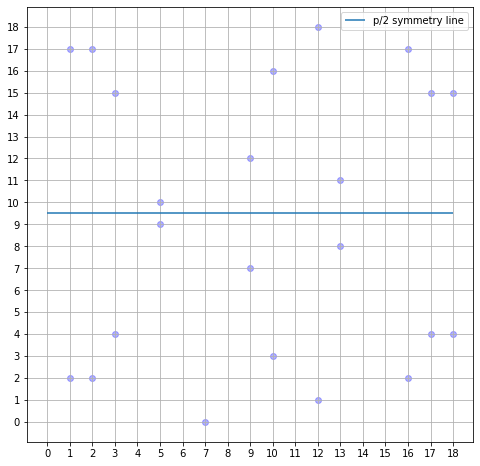

In [312]:
plt.figure(figsize = (8,8))

for (a,b) in l:
    plt.scatter(a,b, color = 'blue', alpha = 0.3)
    

plt.hlines(19/2,0,18, label = 'p/2 symmetry line')
plt.xticks(range(0,19))
plt.yticks(range(0,19))
plt.grid()
plt.legend()

We can see that this scatter plot is symmetric about $p/2=9.5$ (except for $y$=0).

What previously was a continuous curve is now a set of disjoint points in the $xy$-plane. But we can prove that, even if we have restricted our domain, elliptic curves in $\mathbb{F}_p$
still form an abelian group.

#### Point Addition

For reals, we have seen that for 3 aligned points, we have $P+Q+R = 0$. However, lines in $\mathbb{F_p}$ are not the same as lines in $\mathbb{R}$.

Note that in $\mathbb{F_p}$, if $R = (x_r, y_r)$, then $-R = (x_r, -{y_r} \bmod p)$

The equations for calculating point additions are exactly the same as in the previous post, except for the fact that we need to add "**mod p**" at the end of every expression. Therefore, given $P = (x_p, y_p)$, $Q = (x_q, y_q)$ and $R = (x_r, y_r)$
, we can calculate $P+Q=-R$ as follows: 

<br>

$$\begin{align*}
  x_r & = (m^2 - x_p - x_q) \bmod{p} \\
  y_r & = [y_p + m(x_r - x_p)] \bmod{p} \\
      & = [y_q + m(x_r - x_q)] \bmod{p}
\end{align*}$$

If $P \neq Q$, then the slope $m$ assumes the form - 


$$m = (y_p - y_q)(x_p - x_q)^{-1} \bmod{p}$$

Else if $P =  Q$,

$$m = (3 x_p^2 + a)(2 y_p)^{-1} \bmod{p}$$

**Example**

Suppose we have an equation $y^2 = x^3 - 7x + 10 \bmod{19}$.

Let $P$ = (1,2) and $Q$ = (2,17). We want to calculate $P+Q=-R$.

First, calculate the slope $m$ of line connecting $P$ and $Q$ -

In [328]:
m = (2-17)*pow(-1,-1,19) #you could also do (y_q-y_p)(x_q-x_q)^-1 mod p, this gives m =  15
m

-270

Now, coordinates of $R$ - 

In [336]:
x_r =(((m)**2)-2-1)%19
y_r = (2+(m)*(x_r-1))%19
x_r, y_r  #R point

(13, 11)

This gives the value of $-R$

In [337]:
# -R point
y_r = (-y_r)%19

x_r,y_r

(13, 8)

#### The order of an elliptic curve group

It is to note that elliptic curve over finite groups has finite number of points. The order of an elliptic curve is simply the count of all possible points. See [Schoof's algorithm](https://en.wikipedia.org/wiki/Schoof%27s_algorithm). Details of this algorithm skipped.

However, there is this [online tool](https://graui.de/code/elliptic2/) which is quite useful. For any $ y^2 = x^3 + ax + b \pmod{p}$, this tool gives us all the points, total point count and an addition table.

For equation $y^2 = x^3 - 7x + 10 \bmod{19}$, above tool gives us the order $N$ as 24. 


--skipped--

#### Scalar Multiplication and Cyclic Subgroups

Definition is same as before - 

$$n P = \underbrace{P + P + \cdots + P}_{n\ \text{times}}$$

Multiplication over points for elliptic curves in $\mathbb{F}_p$
has an interesting property. For equation $y^2 = x^3 - 7x + 10 \bmod{19}$, let us take a point $P=(1,2)$.

$0P = 0$

$1P = (1,2)$

$2P = (18,15)$

$3P = (9,12)$

$4P = (7,0)$

$5P = (9,7)$

$6P = (18,4)$

$7P = (1,17)$

$8P = 0$

$9P =(1,2)$

$\cdots$

You can keep calculating multiples of $P$. If you do this, you'll notice that after some $n$, $nP = 0P=0,\  (n+1)P = 1P$ and so on. So values $\{0P,1P\cdots(n-1)P\}$ forms a **cyclic subgroup**. The order of this subgroup will be $n$. For our example, order $n$ is 8.

So, we can write what we learned in compact form - 

$$kP = (k\bmod n)P$$

where $k$ is an integer and $n$ is the order of subgroup. (need to verify above rule from some other source)

One more thing, these eight points are **closed under addition**. Which means: however I add $0P, 1P, \cdots, 7P$ the result is always one of these eight points. Again, the other points of the elliptic curve never appear in the results.

Note that 

 1. all these properties are valid for any $P$ for a given elliptic curve. The point $P$ is called **generator** or **base point** of the cyclic subgroup.
 
 
 2. $n$ is not unique to a elliptic group. Different $P$ has different $n$ associated with it. For example, take $P=(2,2)$ for the same curve. For this $P$, $n$ would be $24$.

#### Relation between subgroup order $n$ and group order $N$

$n$ is the smallest divisor of $N$ for which $nP =0$.

For our examples, divisors of $N = 24$ are $\{1,2,3,4,6,8,12,24\}$. We can verify that for $n = 1,2,3,4,6$, $nP \neq 0$ but for $n=8$, $nP=0$.

Note that if $N$ is a prime, then $n$ will either be $1$ or $N$. As you can easily guess, when $n=1$, the subgroup contains only the point at infinity; when $n=N$, the subgroup contains all the points of the elliptic curve.

#### Finding a base point

In preceding section, we have a base point and calculated $n$. We'll do the opposite here, that is, we'll have $n$ and then search for suitable base point.

Note that 

$$nP = 0 \Rightarrow NP = 0$$

Above is true because $N$ is the multiple of $n$.

So,

$$NP = n(hP) =0$$

for some integer $h$. This $h$ is called **cofactor of the subgroup.**

Assume $n$ is prime (for our purposes, we prefer $n$ to be prime). In this case, $n(hP)=0$, so $h(P)$ will be our base point. 

In the light of this, we can outline the following algorithm:

 1. Calculate the order $N$ of the elliptic curve.
 
 2. Choose the order $n$ of the subgroup. For the algorithm to work, this number must be prime and must be a divisor of $N$.
 
 3. Compute the cofactor $h = N/n$.
 
 4. Choose a random point $P$ on the curve.

 5. Compute $G=hP$.

 6. If $G$ is 0, then go back to step 4. Otherwise we have found a generator of a subgroup with order $n$ and cofactor $h$.

Note that this algorithm only works if is $n$ a prime. If $n$ wasn't a prime, then the order of $G$ could be one of the divisors of $n$. (Didn't get this part.)

Let's take $P = (1,2)$ from our example curve. We saw that $n=8$ for this $P$ and this $n$ isn't prime.  This gives $h = 3$. So, $G = 3P= (9,12)$. For this base point, it can be verified that $n=8$. So what is the problem here?




#### Discrete Logarithm

As we did when working with continuous elliptic curves, we are now going to discuss the question: if we know $P$ and $Q$, what is $k$ such that $Q = kP$? This problem, which is known as the discrete logarithm problem for elliptic curves, is believed to be a "hard" problem, in that there is no known polynomial time algorithm that can run on a classical computer

#### Domain Parameters

 - The prime $p$ that specifies the size of the finite field.
 - The coefficients $a$ and $b$ of the elliptic curve equation.
 - The base point $G$ that generates our subgroup.
 - The order $n$ of the subgroup.
 - The cofactor $h$ of the subgroup.

In conclusion, the domain parameters for our algorithms are the sextuple $(p,a,b,G,n,h)$.

Sometimes we have an additional domain parameter: the seed $S$. This is a random number used to generate the coefficients $a$ and $b$, or the base point $G$, or both. These parameters are generated by computing the hash of the seed $S$.

#### Elliptic Curve Cryptography

Finally!

 - The **private key** is a random integer $d$ chosen from $\{1, \dots, n - 1\}$(where $n$
is the order of the subgroup).


 - The public key is the point $H =dG$ where $G$ is the base point of the subgroup
 
 If we know $d$ and $G$ (along with the other domain parameters), finding $H$ is "easy". But if we know $H$ and $G$, finding the private key $d$ is "hard", because it requires us to solve the discrete logarithm problem.
 
Now we are going to describe two public-key algorithms based on that: **ECDH (Elliptic curve Diffie-Hellman)**, which is used for encryption, and **ECDSA (Elliptic Curve Digital Signature Algorithm)**, used for digital signing. 

#### Encryption with ECDH

It is actually a key-agreement protocol, more than an encryption algorithm. This basically means that ECDH defines (to some extent) how keys should be generated and exchanged between parties. How to actually encrypt data using such keys is up to us.



Here's how it works:

 1. First, Alice and Bob generate their own private and public keys. We have the private key $d_A$ and the public key $H_A = d_AG$ for Alice, and the keys $d_B$ and $H_B = d_BG$ for Bob. Note that both Alice and Bob are using the same domain parameters: the same base point $G$ on the same elliptic curve on the same finite field.


 2. Alice and Bob exchange their public keys $H_A$ and $H_B$ over an insecure channel. The Man In the Middle would intercept $H_A$ and $H_B$, but won't be able to find out neither $d_A$ nor $d_B$ without solving the discrete logarithm problem.


 3. Alice calculates $S=d_aH_B$(using her own private key and Bob's public key), and Bob calculates $S =d_bH_A$(using his own private key and Alice's public key). Note that $S$ is the same for both Alice and Bob, in fact: 
 
 $$S = d_A H_B = d_A (d_B G) = d_B (d_A G) = d_B H_A$$
 
The Man In the Middle, however, only knows $H_A$ and $H_B$ (together with the other domain parameters) and would not be able to find out the shared secret $S$ . This is known as the Diffie-Hellman problem, which can be stated as follows: 

>Given three points $P$, $aP$ and $bP$, what is the result of $abP$?

Now that Alice and Bob have obtained the shared secret, they can exchange data with symmetric encryption.

For example, they can use the $x$ coordinate of $S$ as the key to encrypt messages using secure ciphers like [AES](https://en.wikipedia.org/wiki/Advanced_Encryption_Standard) or [3DES](https://en.wikipedia.org/wiki/Triple_DES). This is more or less what TLS does.

#### Example

The curve chosen here is `secp256k1`, from [SECG](https://www.secg.org/) (the "Standards for Efficient Cryptography Group", founded by Certicom). This same curve is also used by [Bitcoin for digital signatures](https://en.bitcoin.it/wiki/Secp256k1). Here are the domain parameters:

 - $p$ = 0xffffffff ffffffff ffffffff ffffffff ffffffff ffffffff fffffffe fffffc2f
 - $a$= 0
 - $b$= 7

 - $x_G$= 0x79be667e f9dcbbac 55a06295 ce870b07 029bfcdb 2dce28d9 59f2815b 16f81798
 - $y_G$= 0x483ada77 26a3c465 5da4fbfc 0e1108a8 fd17b448 a6855419 9c47d08f fb10d4b8
 - $n$= 0xffffffff ffffffff ffffffff fffffffe baaedce6 af48a03b bfd25e8c d0364141

 - $h$= 1

(These numbers were taken from OpenSSL source code.)

Remark - As per [this SECG document](https://www.secg.org/sec1-v2.pdf), $p$ should be chosen such that

$$log_2 p \in \{192,224,256,384,521\}$$

For above mentioned $p$, we can verify this convention.

In [5]:
abc =  int('0xfffffffffffffffffffffffffffffffffffffffffffffffffffffffefffffc2f', 16)
abc

115792089237316195423570985008687907853269984665640564039457584007908834671663

In [6]:
import math

math.log(abc,2)

256.0

In [19]:
int('0xfffffffffffffffffffffffffffffffebaaedce6af48a03bbfd25e8cd0364141',16) 

115792089237316195423570985008687907852837564279074904382605163141518161494337

#### Signing with ECDSA

The scenario is the following: Alice wants to sign a message with her private key $(d_A)$, and Bob wants to validate the signature using Alice's public key $(H_A)$. Nobody but Alice should be able to produce valid signatures. Everyone should be able to check signatures.

Again, Alice and Bob are using the same domain parameters. The algorithm we are going to see is ECDSA, a variant of the Digital Signature Algorithm applied to elliptic curves.

ECDSA works on the hash of the message, rather than on the message itself. The choice of the hash function is up to us, but it should be obvious that a cryptographically-secure hash function should be chosen. The hash of the message ought to be truncated so that the bit length of the hash is the same as the bit length of $n$ (the order of the subgroup). The truncated hash is an integer and will be denoted as $z$.

The algorithm performed by Alice to sign the message works as follows:

 1. Take a random integer $k$ chosen from $\{1, \dots, n - 1\}$(where $n$ is still the subgroup order).

 2. Calculate the point $P =kG$ (where $G$ is the base point of the subgroup).

 3. Calculate the number $r=x_P \bmod n$ (where $x_P$is the $x$ coordinate of $P$).

 4. If $r=0$, then choose another $k$ and try again.

 5. Calculate $s=k^{-1}(z+rd_A)\bmod n$(where $d_A$ is Alice's private key and $k^{-1}$ is the multiplicative inverse of $k$ modulo $n$).
 
 6. If $s=0$, then choose another $k$ and try again.

The pair $(r,s)$ is **the signature**.

Note that in order to calculate $s$, we have computed the inverse $k$ of modulo $n$. We have already said in the previous post that this is guaranteed to work only if $n$ is a prime number. If a subgroup has a non-prime order, ECDSA can't be used. It's not by chance that almost all standardized curves have a prime order, and those that have a non-prime order are unsuitable for ECDSA.

#### Verifying Signatures

In order to verify the signature we'll need Alice's public key $H_A$, the (truncated) hash $z$ and, obviously, the signature $(r,s)$.

 1. Calculate the integer $u_1 = s^{-1} z \bmod{n}$.

 2. Calculate the integer $u_2 = s^{-1} r \bmod{n}$.

 3. Calculate the point $P = u_1 G + u_2 H_A$.


The signature is valid only if $r = x_P \bmod{n}$.

#### Correctness of the algorithm

Let's start from $P = u_1 G + u_2 H_A$. We know, from the definition of public key, that $H_A=d_AG$ (where $d_A$ is the 
private key). We can write: 

$$\begin{align*}
  P & = u_1 G + u_2 H_A \\
    & = u_1 G + u_2 d_A G \\
    & = (u_1 + u_2 d_A) G
\end{align*}$$

Using the definitions of $u_1$ and $u_2$, we can write:

$$\begin{align*}
  P & = (u_1 + u_2 d_A) G \\
    & = (s^{-1} z + s^{-1} r d_A) G \\
    & = s^{-1} (z + r d_A) G
\end{align*}$$


Here we have omitted "$\bmod n$" both for brevity, and because the cyclic subgroup generated by $G$ has order $n$ , hence "$\bmod n$" is superfluous.

Previously, we defined $s = k^{-1} (z + rd_A) \bmod{n}$. Multiplying each side of the equation by $k$ and dividing by $s$, we get: $k = s^{-1} (z + rd_A) \bmod{n}$

Substituting this result in our equation for $P$, we get: 

$$\begin{align*}
  P & = s^{-1} (z + r d_A) G \\
    & = k G
\end{align*}$$

This is the same equation for $P$ we had at step 2 of the signature generation algorithm! When generating signatures and when verifying them, we are calculating the same point $P$, just with a different set of equations. This is why the algorithm works.

#### Example

--skipped--

#### The importance of $k$

When generating ECDSA signatures, it is important to keep the secret really secret. If we used the same for all signatures, or if our random number generator were somewhat predictable, an attacker would be able to find out the private key!

This is the kind of mistake made by Sony a few years ago. Basically, the PlayStation 3 game console can run only games signed by Sony with ECDSA. This way, if I wanted to create a new game for PlayStation 3, I couldn't distribute it to the public without a signature from Sony. The problem is: all the signatures made by Sony were generated using a static $k$.

In this situation, we could easily recover Sony's private key $d$ by buying just two signed games, extracting their hashes ($z_1$ and $z_2$) and their signatures ($(r_1,s_1)$ and $(r_2,s_2)$ ), together with the domain parameters. Here's how:

 - First off, note that $r_1=r_2$(because $r = x_P \bmod{n}$ and $P=kG$ is the same for both signatures).
 

 - Consider that $(s_1 - s_2) \bmod{n} = k^{-1} (z_1 - z_2) \bmod{n}$ (this result comes directly from the equation for $s$).

 
 - Now multiply each side of the equation by: $k (s_1 - s_2) \bmod{n} = (z_1 - z_2) \bmod{n}$.

 
 - Divide by $(s_1-s_2)$to get $k = (z_1 - z_2)(s_1 - s_2)^{-1} \bmod{n}$.
 
The last equation lets us calculate $k$ using only two hashes and their corresponding signatures. Now we can extract the private key using the equation for $s$:

$$s = k^{-1}(z + rd_S) \bmod{n}\ \ \Rightarrow\ \ d_S = r^{-1} (sk - z) \bmod{n}$$
 

In [341]:
x = np.linspace(-10,10,21)
y= (pow(x,3)-(3*x)+5)

mask = (y >=0)
y[mask], len(y[mask])

(array([  3.,   7.,   5.,   3.,   7.,  23.,  57., 115., 203., 327., 493.,
        707., 975.]),
 13)

In [94]:
x

array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.])

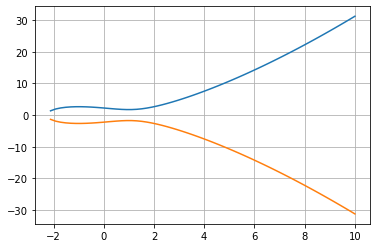

In [92]:
plt.plot(x[39:],np.sqrt(y[mask]))

plt.plot(x[39:],-np.sqrt(y[mask]))

plt.grid()

P = (2,2)

0P = 0
1P = (2,2)
2P = (13,8) 
3P = (1,2)
4P = (16,17) 
5P = (10,3)
6P = (18,15)
7P = (3,15)
8P = (12,1)
9P = (9,12)
10P = (5,10)
11P = (17,15)
12P= (7,0)
13P= (17,4)
23P = (2,17)
24P = 0


In [10]:
17**2

289

In [12]:
285%19

0